# Ressource
 - https://github.com/pydy/pydy-tutorial-human-standing
 - https://www.sympy.org/scipy-2017-codegen-tutorial/
 - https://www.youtube.com/watch?v=tsOzJ-Co938
 - https://www.youtube.com/channel/UCW2fXzW_yUXugrWC9PpA3eA/videos
 - https://github.com/AndrewChap/symdim


# Derivatives

In [1]:
from sympy import diff, sin, exp 
from sympy.abc import x,y 
expr = x*sin(x*x)+1
expr

x*sin(x**2) + 1

In [2]:
diff(expr,x)

2*x**2*cos(x**2) + sin(x**2)

In [3]:
diff(exp(x**2),x)

2*x*exp(x**2)

In [4]:
diff(x**4,x,3)

24*x

In [5]:
for i in range(1,4): print (diff(x**4,x,i))

4*x**3
12*x**2
24*x


In [6]:
from sympy import Derivative 
d=Derivative(expr) 
d

Derivative(x*sin(x**2) + 1, x)

In [7]:
d.doit()

2*x**2*cos(x**2) + sin(x**2)

In [8]:
import sympy as sp
m, n, a, b = sp.symbols('m n a b')

expr = (a*x + b)**m

expr.diff((x, n))

Derivative((a*x + b)**m, (x, n))

In [47]:
hp, c, lmbda, T, kB = sp.symbols("h_p c lambda T k_B")

In [48]:
hp*c*lmbda*T*kB

T*c*h_p*k_B*lambda

Luminance CN

In [44]:
def sp_LCN(lmbda, T):
    return 2*hp*c/lmbda**5 * 1/(sp.exp(hp*c/(lmbda*kB*T))-1)

In [49]:
LCN = sp_LCN(sp.Symbol("lambda"), sp.Symbol("T"))

In [50]:
LCN

2*c*h_p/(lambda**5*(exp(c*h_p/(T*k_B*lambda)) - 1))

In [14]:
Eph = hp*c/lmbda

In [15]:
Eph

c*h_p/lambda

In [39]:
from sympy import symbols, cos, dotprint
from graphviz import Source

src = Source(dotprint(Eph))

src.render('output.gv', view=True)


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'output.gv'], make sure the Graphviz executables are on your systems' PATH

In [29]:
import graphviz

In [31]:

dot = graphviz.Digraph()

In [35]:
dot.attr?

Signature: dot.attr(kw=None, _attributes=None, **attrs)
Docstring:
Add a general or graph/node/edge attribute statement.

Args:
    kw: Attributes target (``None`` or ``'graph'``, ``'node'``, ``'edge'``).
    attrs: Attributes to be set (must be strings, may be empty).

See the :ref:`usage examples in the User Guide <attributes>`.
File:      /opt/anaconda3/lib/python3.7/site-packages/graphviz/dot.py
Type:      method


In [25]:
from sympy.printing.dot import dotprint

In [26]:
dotprint(Eph)

'digraph{\n\n# Graph style\n"ordering"="out"\n"rankdir"="TD"\n\n#########\n# Nodes #\n#########\n\n"Mul(Symbol(\'c\'), Symbol(\'h_p\'), Pow(Symbol(\'lambda\'), Integer(-1)))_()" ["color"="black", "label"="Mul", "shape"="ellipse"];\n"Symbol(\'c\')_(0,)" ["color"="black", "label"="c", "shape"="ellipse"];\n"Symbol(\'h_p\')_(1,)" ["color"="black", "label"="h_p", "shape"="ellipse"];\n"Pow(Symbol(\'lambda\'), Integer(-1))_(2,)" ["color"="black", "label"="Pow", "shape"="ellipse"];\n"Symbol(\'lambda\')_(2, 0)" ["color"="black", "label"="lambda", "shape"="ellipse"];\n"Integer(-1)_(2, 1)" ["color"="black", "label"="-1", "shape"="ellipse"];\n\n#########\n# Edges #\n#########\n\n"Mul(Symbol(\'c\'), Symbol(\'h_p\'), Pow(Symbol(\'lambda\'), Integer(-1)))_()" -> "Symbol(\'c\')_(0,)";\n"Mul(Symbol(\'c\'), Symbol(\'h_p\'), Pow(Symbol(\'lambda\'), Integer(-1)))_()" -> "Symbol(\'h_p\')_(1,)";\n"Mul(Symbol(\'c\'), Symbol(\'h_p\'), Pow(Symbol(\'lambda\'), Integer(-1)))_()" -> "Pow(Symbol(\'lambda\'), Integ

In [24]:
sp.srepr(Eph)

"Mul(Symbol('c'), Symbol('h_p'), Pow(Symbol('lambda'), Integer(-1)))"

In [16]:
LCN_en = LCN
LCN_ph = LCN/Eph

In [17]:
dLCN_en_dT = sp.diff(LCN_en, T)
dLCN_ph_dT = sp.diff(LCN_ph, T)

In [18]:
dLCN_ph_dT

2*c*h_p*exp(c*h_p/(T*k_B*lambda))/(T**2*k_B*lambda**5*(exp(c*h_p/(T*k_B*lambda)) - 1)**2)

In [19]:
from scipy.constants import constants

In [20]:
hp_v = constants.h
c_v = constants.c
kB_v = constants.k

In [21]:
hp_v

6.62607015e-34

In [22]:
dLCN_ph_dT_v = dLCN_ph_dT.subs([(hp, hp_v), (c, c_v), (kB, kB_v)])
dLCN_ph_dT_v

0.0287755375500787*exp(0.0143877687750393/(T*lambda))/(T**2*lambda**5*(exp(0.0143877687750393/(T*lambda)) - 1)**2)

In [23]:
from sympy.physics.units import speed_of_light, meter, second, h, k
dLCN_ph_dT_vsp = dLCN_ph_dT.subs([(hp, h), (c, speed_of_light), (kB, k)])


ImportError: cannot import name 'k' from 'sympy.physics.units' (/opt/anaconda3/lib/python3.7/site-packages/sympy/physics/units/__init__.py)

# Integrals

In [64]:
import sympy as sp
 
a, b, c = sp.symbols("a b c")
x, y = sp.symbols("x y")
 
display(sp.integrate(sp.cos(x), x))
display(sp.integrate(sp.exp(-x), (x, 0, sp.oo)))
display(sp.integrate(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo)))

expr = sp.integrate(x**x, x)
expr
display(expr)
 
expr = sp.Integral(sp.log(x)**2, x)
expr
display(expr)
 
expr.doit()

sin(x)

1

pi

Integral(x**x, x)

Integral(log(x)**2, x)

x*log(x)**2 - 2*x*log(x) + 2*x

In [62]:
 
from sympy.abc import x,y,z
x,y,z=sp.symbols("x,y,z")
x=sp.Symbol('x')
a0, a1, a2, a3, a4 = sp.symbols('a:5')
a0
a0 = 1
a0
# substitution :
#note : expression are immutable, new expression is returned by subs
# multiple substitution
expr.subs([(x, 2), (y, 4), (z, 0)])
# substitue value
expr.subs(x, 0)
# subsitute expression
expr.subs(x, y)

expr.evalf(subs={x: 2.4})

# simpify : convert string to expression
evluate=False
# lambdify : convert expr to numpy function
f = sp.lambdify(x, expr, "numpy")
f = sp.lambdify([a,b],expr)

LCN = 2*a*b**2/c**5 * 1/(sp.exp(a*b/10)-1)
LCN

LCN.as_ordered_factors()

LCN.as_ordered_terms()

LCN.as_terms()

sp.solve(LCN, a)

[]

# Solving equations

In [60]:
import sympy
from sympy import solveset
x, y, z = sympy.symbols("x, y, z")

# get solution as set
display(solveset(x**2 -4, x))
display(solveset(x**2 +4, x))
display(solveset(x**2+4, x, domain=sp.S.Reals)) # solve of real domain with singleton Reals
display(solveset(sp.sin(x), x))
# no solution found returns a condition set
display(solveset(sp.exp(x) + sp.cos(x) + 1, x, domain=sp.S.Reals))
# solve for symbol expression
display(solveset(x*y-z, y))
# solve for radius based on volume of sphere
r, V = symbols("r, V", positive=True)
display(solveset(V - sp.S(4)/3*sp.pi*r**3, r, domain=sp.S.Reals)) # use sp.S(4) to prevent numerical simplification
display((4*sp.pi*r**2).subs({r:sp.S(4)/3*sp.pi*r**3}))
V_r = list(solveset(V - sp.S(4)/3*sp.pi*r**3, r, domain=sp.S.Reals))[0]
display(((4*sp.pi*r**2).subs({r:V_r}))) # get the surface in terms of Volume
a, b, c, x = sp.symbols("a, b, c, x")
display(sp.solveset(a*x**2+b*x+c, x))
eq = sp.Eq(x**2, a)
display(eq)
display(eq.lhs)
display(eq.rhs)
display(solveset(eq, x))
x, y, z, n = symbols("x, y, z, n")
sp.integrate(x**n, (x, y, z))
# average value over a-b
x, a, b = symbols("x, a, b")
exp = 2*x**2
display(sp.integrate(exp, (x, a, b))/(b-a))
display((sp.integrate(exp, (x, a, b))/(b-a)).subs({a:0, b:1}))

FiniteSet(-2, 2)

FiniteSet(-2*I, 2*I)

EmptySet

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

ConditionSet(x, Eq(exp(x) + cos(x) + 1, 0), Reals)

FiniteSet(z/x)

FiniteSet(6**(1/3)*V**(1/3)/(2*pi**(1/3)))

64*pi**3*r**6/9

6**(2/3)*pi**(1/3)*V**(2/3)

FiniteSet(-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a))

Eq(x**2, a)

x**2

a

FiniteSet(sqrt(a), -sqrt(a))

(-2*a**3/3 + 2*b**3/3)/(-a + b)

2/3

# Plotting

6**(2/3)*pi**(1/3)*V**(2/3)


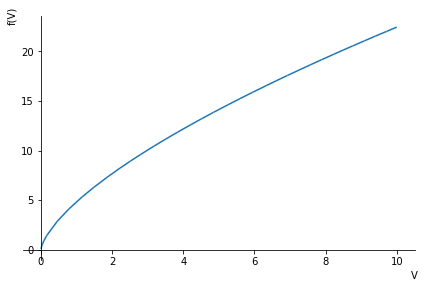

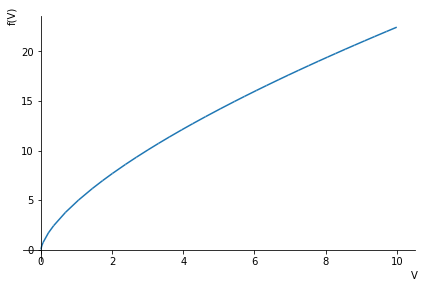

In [61]:
# plotting
surface_by_v = (4*sp.pi*r**2).subs({r:V_r})
print(surface_by_v)
sp.plot(surface_by_v)
sp.plot((6**(sp.S(2)/3)*sp.pi**(sp.S(1)/3)*V**(sp.S(2)/3)))

# Solve

In [ ]:
# solving linear equation
from sympy import symbols, Eq, Matrix, solve_linear_system

x, y = symbols("x y")
eq1 = Eq( 2 * x +-1 * y, -4)
eq2 = Eq( 3 * x +-1 * y, -2)

display(eq1)
display(eq2)

eq1_row = [2, -1, -4]
eq2_row = [3, -1, -2]
sys = Matrix([eq1_row, eq2_row])
display(sys)
display(solve_linear_system(sys, x, y))
 
t, c = sp.symbols("t c")
u = sp.Function('u')
 
display(Eq(sp.diff(u(x, t), t, 2),
  c**2 * sp.diff(u(x,t), x, 2)))
 
row_1 = [1, 2, x]
row_2 = [4, 5, 2*y]
# 2D matrix with list of rows
display(Matrix([row_1, row_2]))
# col-vector with list
display(Matrix(row_1))
 

# Matrices

In [55]:
r, theta = symbols("r, theta")
rot = sp.Matrix([[r*sp.cos(theta), -r*sp.sin(theta)],
               [r*sp.sin(theta), r*sp.cos(theta)],
                ])
# matrix
display(rot)
# determinant
display(rot.det())
# inverse
display(rot.inv())
# singular value
display(rot.singular_values())
# multiply matrix by scalar
display(2*rot)
# matrix multiplication
display(rot**2)
display(rot.inv()*rot)
display(sp.simplify(rot.inv()*rot))
# eigen vectors
display(rot.eigenvects())
# eigen values
display(rot.eigenvals())
# indexing matrix
display(rot[1, :])

Matrix([
[r*cos(theta), -r*sin(theta)],
[r*sin(theta),  r*cos(theta)]])

r**2*sin(theta)**2 + r**2*cos(theta)**2

Matrix([
[ cos(theta)/(r*sin(theta)**2 + r*cos(theta)**2), sin(theta)/(r*sin(theta)**2 + r*cos(theta)**2)],
[-sin(theta)/(r*sin(theta)**2 + r*cos(theta)**2), cos(theta)/(r*sin(theta)**2 + r*cos(theta)**2)]])

[sqrt(r*sqrt(cos(theta - conjugate(theta))**2 - 1)*conjugate(r) + r*cos(theta - conjugate(theta))*conjugate(r)),
 sqrt(-r*sqrt(cos(theta - conjugate(theta))**2 - 1)*conjugate(r) + r*cos(theta - conjugate(theta))*conjugate(r))]

Matrix([
[2*r*cos(theta), -2*r*sin(theta)],
[2*r*sin(theta),  2*r*cos(theta)]])

Matrix([
[-r**2*sin(theta)**2 + r**2*cos(theta)**2,            -2*r**2*sin(theta)*cos(theta)],
[            2*r**2*sin(theta)*cos(theta), -r**2*sin(theta)**2 + r**2*cos(theta)**2]])

Matrix([
[r*sin(theta)**2/(r*sin(theta)**2 + r*cos(theta)**2) + r*cos(theta)**2/(r*sin(theta)**2 + r*cos(theta)**2),                                                                                                         0],
[                                                                                                        0, r*sin(theta)**2/(r*sin(theta)**2 + r*cos(theta)**2) + r*cos(theta)**2/(r*sin(theta)**2 + r*cos(theta)**2)]])

Matrix([
[1, 0],
[0, 1]])

[(r*(-sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta)),
  1,
  [Matrix([
   [sin(theta)/sqrt(cos(theta)**2 - 1)],
   [                                 1]])]),
 (r*(sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta)),
  1,
  [Matrix([
   [-sin(theta)/sqrt(cos(theta)**2 - 1)],
   [                                  1]])])]

{r*(-sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta)): 1,
 r*(sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta)): 1}

Matrix([[r*sin(theta), r*cos(theta)]])

# Matrix symbol

In [51]:
n, m = symbols("n m", integer=True)
M = sp.MatrixSymbol("M", n, m)
b = sp.MatrixSymbol("b", m, 1)
display(M*b)
display(sp.Transpose(M*b))
display(sp.Transpose(M*b).doit())

M*b

(M*b).T

b.T*M.T